# Scope

Notebook that takes the data exported by the wrangling notebook and performs data analysis on it.

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from matplotlib.colors import ListedColormap

# Load Data

In [2]:
df = pd.read_csv(Path("data") / "data.csv")
df = df.set_index("id")

In [3]:
df.head()

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,has_license,is_bathroom_private
id,,,,,,,,,,,,,,,,,,,,,
2818,3159,2008-09-24,within an hour,1.0,1.00,t,Indische Buurt,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.82,t,1,0,1,0,1.81,Amsterdam,t,f
20168,59484,2009-12-02,within an hour,1.0,0.98,f,Grachtengordel,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.49,t,2,0,2,0,2.30,Amsterdam,t,t
27886,97647,2010-03-23,within an hour,1.0,1.00,t,Westelijke Eilanden,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.79,t,1,0,1,0,1.84,Amsterdam,t,f
28871,124245,2010-05-13,within an hour,1.0,0.99,t,Amsterdam Centrum,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.82,f,2,0,2,0,2.70,Amsterdam,t,f
29051,124245,2010-05-13,within an hour,1.0,0.99,t,Amsterdam Centrum,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.75,f,2,0,2,0,3.98,Amsterdam,t,f


# Color Palette

In [4]:
# Define global color palette that would be used through all the graphs.
COLOR_PALETTE = sns.color_palette("crest")
COLOR_PALETTE

[(0.48942421, 0.72854938, 0.56751036),
 (0.34892097, 0.64828676, 0.56513633),
 (0.24929311, 0.56486397, 0.5586654),
 (0.15615526, 0.47913212, 0.54850526),
 (0.11131735, 0.39155635, 0.53422678),
 (0.14573579, 0.29354139, 0.49847009)]

In [5]:
sns.set_palette(COLOR_PALETTE)

# Prices

### By City

In [6]:
# Compute the mean price over all the cities.
city_prices = df.groupby("city")["price"].mean()
city_prices = city_prices.sort_values(ascending=True)
city_prices = city_prices.reset_index()

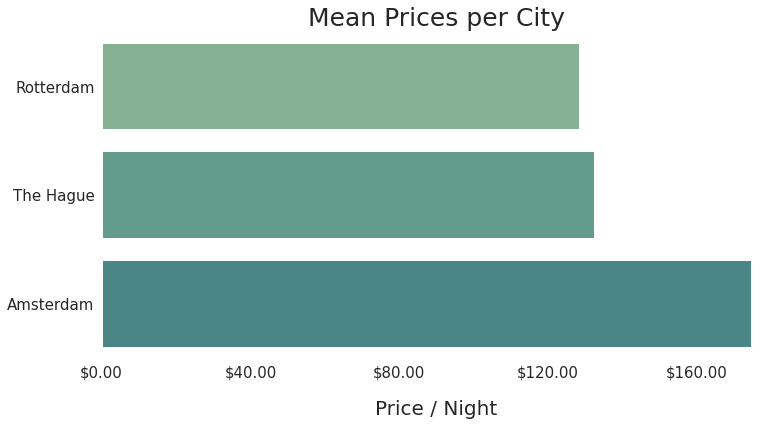

In [7]:
# Plot the mean prices as a bar plot.
_, ax = plt.subplots(1, 1, figsize=(12, 6))
ax = sns.barplot(x="price", y="city", data=city_prices, orient="h", ax=ax)

ax.set_xlabel("Price / Night", fontsize=20)
ax.set_ylabel("", fontsize=20)

ax.set_xlim(0, 180)

ax.xaxis.set_major_locator(MultipleLocator(40))
ax.xaxis.set_major_formatter(FormatStrFormatter('$%1.2f'))

ax.set_facecolor("white")
ax.tick_params(axis='both', which='major', labelsize=15)
ax.xaxis.labelpad = 20

plt.title("Mean Prices per City", fontsize=25)
plt.savefig(Path("images") / "city_prices.png", bbox_inches="tight")

### By Neighbourhood

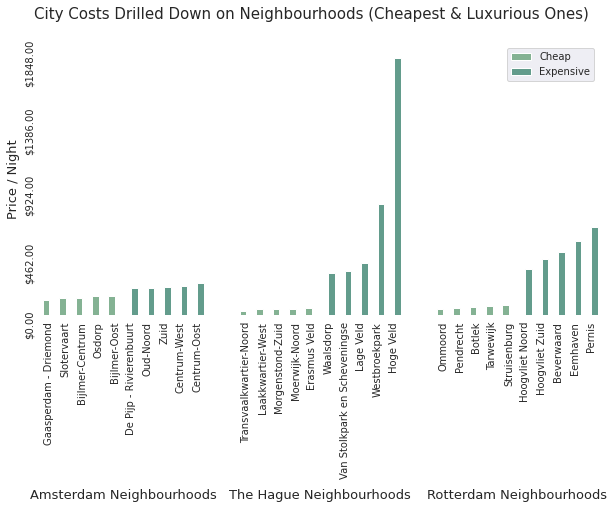

In [8]:
# Compute the mean prices over all the cities and for the most & least expensive neighbourhoods.
# We will plot the results as bar plots.

fig, axes = plt.subplots(1, 3, sharey="all", figsize=(10, 5))
for top_ax, city in zip(axes.flatten(), df["city"].unique()):
    city_neighbourhoods = df[df["city"] == city]
    city_prices = city_neighbourhoods.groupby(["neighbourhood_cleansed"], as_index=False)["price"].mean().sort_values(
        by="price", ascending=True)

    cheap_city_prices = city_prices.iloc[:5].copy()
    cheap_city_prices["cost"] = "Cheap"
    expensive_city_prices = city_prices.iloc[-5:].copy()
    expensive_city_prices["cost"] = "Expensive"
    aggregated_city_prices = pd.concat([cheap_city_prices, expensive_city_prices], axis=0)

    aggregated_city_prices["neighbourhood_cleansed"] = aggregated_city_prices["neighbourhood_cleansed"].transform(
        lambda item: " ".join(item.split(" ")[:4]))
    ax = sns.barplot(x="neighbourhood_cleansed", y="price", data=aggregated_city_prices, hue="cost", ax=top_ax)
    if city == "Amsterdam":
        ax.set_ylabel("Price / Night", fontsize=13)
    else:
        ax.set_ylabel("")
    ax.set_xlabel(f"{city} Neighbourhoods", fontsize=13)

    ax.tick_params(labelrotation=90)
    ax.set_facecolor("white")
    ax.get_legend().remove()

    ax.set_ylim(0, 1850)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.xaxis.labelpad = 10

    ax.yaxis.set_major_locator(MultipleLocator(1850 // 4))
    ax.yaxis.set_major_formatter(FormatStrFormatter('$%1.2f'))

plt.legend()
fig.align_xlabels(axes)
fig.suptitle("City Costs Drilled Down on Neighbourhoods (Cheapest & Luxurious Ones)", fontsize=15)
plt.savefig(Path("images") / "city_neighbourhood_prices.png", bbox_inches="tight")

# Availability / Demand

In [9]:
[c for c in df.columns if "availability" in c]

['has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365']

In [10]:
[c for c in df.columns if "occupancy" in c]

[]

In [11]:
print(f"Availability percentage: {(len(df) - len(df[df['has_availability'] == 'f'])) / len(df)}")
print("We can see that most of the properties do have availability information.")

Availability percentage: 0.9973478503629257
We can see that most of the properties do have availability information.


In [12]:
def compute_availability_df(df: pd.DataFrame, days: int, group_by: str) -> pd.DataFrame:
    """
        Compute the availability & occupancy mean relative to a given features.

    :param df: The DataFrame we will be doing analytics on.
    :param days: The numbers of availability days.
    :param group_by: The features we will be doing the mean to.

    :return: A DataFrame with mean values relative to "group_by".
    """

    assert days in (30, 60, 90, 365)

    availability_df = df[df["has_availability"] == "t"].copy()

    availability_df = availability_df.groupby(group_by)[f"availability_{days}"].\
            mean().\
            sort_values(ascending=False).\
            rename(f"availability_{days}").\
            to_frame().\
            reset_index()
    availability_df[f"occupancy_{days}"] = days - availability_df[f"availability_{days}"]

    return availability_df

### By City

In [13]:
def render_city_occupancy_plot(df: pd.DataFrame, days: int):
    """
        Render the occupancy information as bar plots relative to every city.
    """
    availability_df = compute_availability_df(df, days, group_by="city")

    cities = availability_df["city"].unique().tolist()
    cities.sort()

    _, ax = plt.subplots(1, 1, sharey="all", figsize=(18, 9))

    ax = sns.barplot(y="city", x=f"occupancy_{days}", data=availability_df, ax=ax, hue_order=cities, orient="h")
    ax.set_xlabel(f"Occupancy", fontsize=20)
    ax.set_ylabel("")

    ax.tick_params(labelrotation=25)

    x_max = int(availability_df[f"occupancy_{days}"].max() * 1.2)
    ax.set_xlim(0, x_max)

    ax.set_facecolor("white")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.xaxis.labelpad = 10

    ax.xaxis.set_major_locator(MultipleLocator(x_max // 5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%1.d'))

    plt.title("Demand in Every City Over the Last 365 Days", fontsize=25)
    plt.savefig(Path("images") / "city_demand.png", bbox_inches="tight")

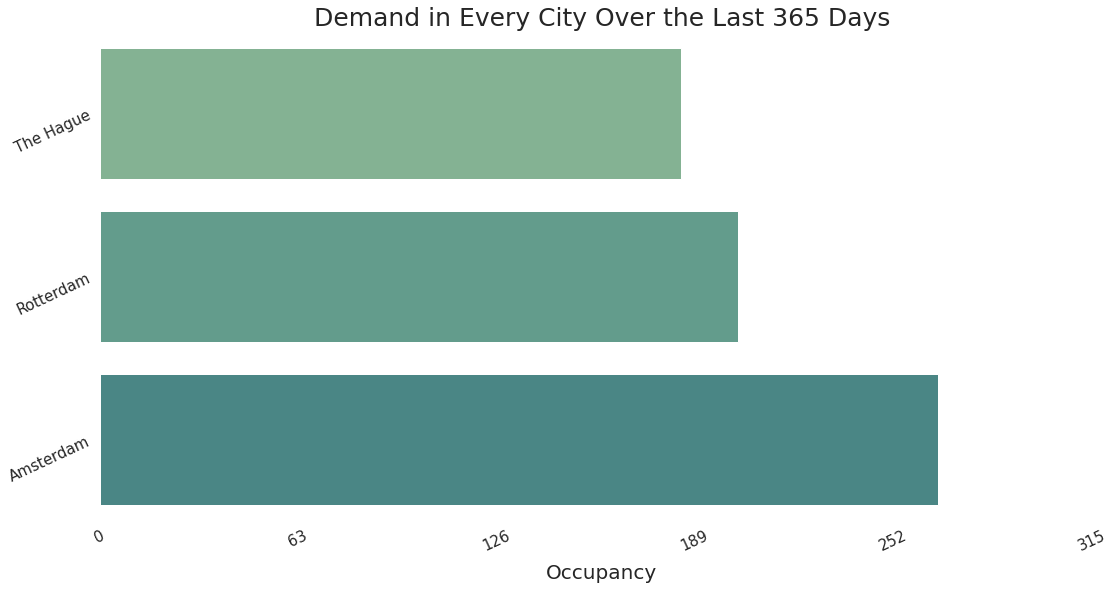

In [14]:
render_city_occupancy_plot(df, days=365)

### By Neighbourhood

In [15]:
def render_neighbourhood_occupancy_plot(df: pd.DataFrame, days: int):
    """
        Render the occupancy information as bar plots relative to every city and the most & least occupied neighbourhoods.
    """

    fig, axes = plt.subplots(1, 3, sharey="all", figsize=(10, 5))
    for top_ax, city in zip(axes.flatten(), df["city"].unique()):
        city_neighbourhoods = df[df["city"] == city]
        city_availability_df = compute_availability_df(city_neighbourhoods, days, group_by="neighbourhood_cleansed")
        city_availability_df = city_availability_df.sort_values(by=f"occupancy_{days}", ascending=True)

        low_occupancy_cities = city_availability_df.iloc[:5].copy()
        low_occupancy_cities["occupancy"] = "Least"
        high_occupancy_cities = city_availability_df.iloc[-5:].copy()
        high_occupancy_cities["occupancy"] = "Most"
        aggregated_occupancies = pd.concat([low_occupancy_cities, high_occupancy_cities], axis=0)

        aggregated_occupancies["neighbourhood_cleansed"] = aggregated_occupancies["neighbourhood_cleansed"].transform(
            lambda item: " ".join(item.split(" ")[:4]))
        ax = sns.barplot(x="neighbourhood_cleansed", y=f"occupancy_{days}", data=aggregated_occupancies, hue="occupancy", ax=top_ax)
        if city == "Amsterdam":
            ax.set_ylabel("Occupancy", fontsize=13)
        else:
            ax.set_ylabel("")
        ax.set_xlabel(f"{city} Neighbourhoods", fontsize=13)

        ax.tick_params(labelrotation=90)
        ax.set_facecolor("white")
        ax.get_legend().remove()

        ax.set_ylim(0, 400)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.xaxis.labelpad = 10

        ax.yaxis.set_major_locator(MultipleLocator(50))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%1.d'))

    plt.legend()
    fig.align_xlabels(axes)
    fig.suptitle("City Occupancy Drilled Down on Neighbourhoods (Most & Least in Demand)", fontsize=15)
    plt.savefig(Path("images") / "city_neighbourhood_occupancy.png", bbox_inches="tight")

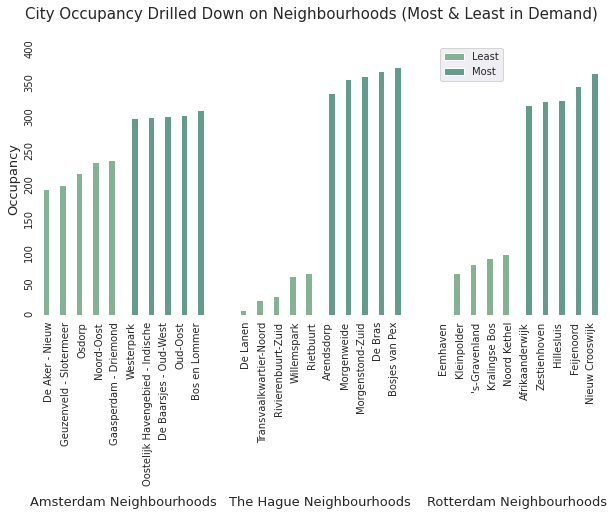

In [16]:
render_neighbourhood_occupancy_plot(df, 365)

# Price / Review Score Correlation

In [17]:
# Drop the price outliers. Those values are taken from the analysis done in the wrangling notebook.
# Probably we could look into more detail into more features, but we wanted to keep things simple, so we looked only at the target/label.
prices_df = df[(0 < df["price"]) & (df["price"] < 2000)].copy()

In [18]:
# Create a set of bins relative to we will compute the review score rating
price_bins = pd.cut(
    prices_df["price"],
    bins=[0, 250, 500, 750, 1000, 1250, 1500, 1750],
)
prices_df["price_bins"] = price_bins
prices_df["price_bins"]

id
2818                  (0, 250]
20168                 (0, 250]
27886                 (0, 250]
28871                 (0, 250]
29051                 (0, 250]
                        ...   
583946925112383381    (0, 250]
584184287780116672    (0, 250]
584375479743910277    (0, 250]
586855632975181618    (0, 250]
588089624475242042    (0, 250]
Name: price_bins, Length: 7149, dtype: category
Categories (7, interval[int64, right]): [(0, 250] < (250, 500] < (500, 750] < (750, 1000] < (1000, 1250] < (1250, 1500] < (1500, 1750]]

In [19]:
# Compute the mean review score rating for every bin.
price_bin_groups = prices_df.groupby("price_bins")["review_scores_rating"].mean()
price_bin_groups = price_bin_groups.reset_index()
price_bin_groups = price_bin_groups.sort_values(by="price_bins", ascending=True)

# Format the price bins.
price_bin_groups["price_bins_formatted"] = price_bin_groups["price_bins"].transform(
    lambda price_bin: f"${price_bin.left} - ${price_bin.right}", axis=0)
price_bin_groups["price_bins_formatted"]

0        $0 - $250
1      $250 - $500
2      $500 - $750
3     $750 - $1000
4    $1000 - $1250
5    $1250 - $1500
6    $1500 - $1750
Name: price_bins_formatted, dtype: category
Categories (7, object): ['$0 - $250' < '$250 - $500' < '$500 - $750' < '$750 - $1000' < '$1000 - $1250' < '$1250 - $1500' < '$1500 - $1750']

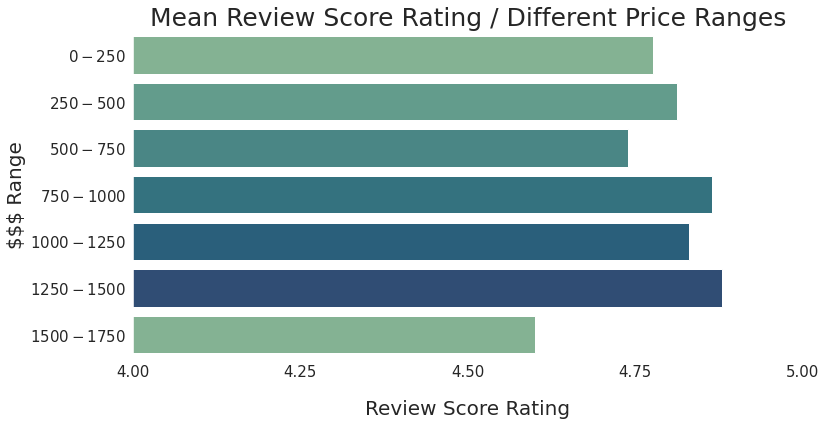

In [20]:
# Plot the mean review score rating as a bar plot.

_, ax = plt.subplots(1, 1, figsize=(12, 6))
ax = sns.barplot(x="review_scores_rating", y="price_bins_formatted", data=price_bin_groups, orient="h", ax=ax,
                 palette=COLOR_PALETTE)

ax.set_xlabel("Review Score Rating", fontsize=20)
ax.set_ylabel("$$$ Range", fontsize=20)

ax.set_xlim(4, 5)

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.xaxis.set_major_formatter(FormatStrFormatter('%1.2f'))

ax.set_facecolor("white")
ax.tick_params(axis='both', which='major', labelsize=15)
ax.xaxis.labelpad = 20

plt.title("Mean Review Score Rating / Different Price Ranges", fontsize=25)
plt.savefig(Path("images") / "price_bins_review_score_rating.png", bbox_inches="tight")